## S&P 500 Analysis
***

In [ ]:
# Packages

import pandas as pd
import matplotlib.pyplot as plt

### Import file and assign file tabs

In [273]:
# Import full dataset 
xls=pd.ExcelFile('histretSP.cleaned.xls') 

# Individual tabs within excel file
rby = pd.read_excel(xls, 'Returns by year') 
tbill = pd.read_excel(xls, 'T. Bill rates')
sp = pd.read_excel(xls, 'S&P 500 & Raw Data')
tbond = pd.read_excel(xls, 'T. Bond return')

# Make column names usable
rby.columns = RBY.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
sp.columns = sp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### Explore data

In [274]:
# Inspect columns
for col in sp.columns: 
    print(col)

year
s&p_500
dividends
dividend_yield
t.bond_rate
return_on_bond


In [275]:
# Also inspect columns
sp.columns

Index(['year', 's&p_500', 'dividends', 'dividend_yield', 't.bond_rate',
       'return_on_bond'],
      dtype='object')

In [276]:
# Head
sp.head()

,year,s&p_500,dividends,dividend_yield,t.bond_rate,return_on_bond
0,1927,17.66,0.61810,0.035,0.0317,NaN
1,1928,24.35,1.04705,0.043,0.0345,0.008355
2,1929,21.45,0.87945,0.041,0.0336,0.042038
3,1930,15.34,0.72098,0.047,0.0322,0.045409
4,1931,8.12,0.49532,0.061,0.0393,-0.025589


In [277]:
# Tail
sp.tail()

,year,s&p_500,dividends,dividend_yield,t.bond_rate,return_on_bond
87,2014,2058.90,39.44,0.019156,0.0217,0.107462
88,2015,2043.90,43.39,0.021229,0.0227,0.012843
89,2016,2238.83,45.70,0.020412,0.0245,0.006906
90,2017,2673.61,48.93,0.018301,0.0241,0.028017
91,2018,2506.85,53.61,0.021385,0.0288,-0.000167


### A Look at the last decade

In [290]:
# Last 10 observations / years of `sp 500`
ty = sp['s&p_500'][-10:]
ty

82    1115.10
83    1257.64
84    1257.60
85    1426.19
86    1848.36
87    2058.90
88    2043.90
89    2238.83
90    2673.61
91    2506.85
Name: s&p_500, dtype: float64

In [291]:
# Last 10; Add Column Names
ty = pd.DataFrame({'Count':ty.index, 'Price':ty.values})
del ty['Count']
ty

,Price
0,1115.10
1,1257.64
2,1257.60
3,1426.19
4,1848.36
5,2058.90
6,2043.90
7,2238.83
8,2673.61
9,2506.85


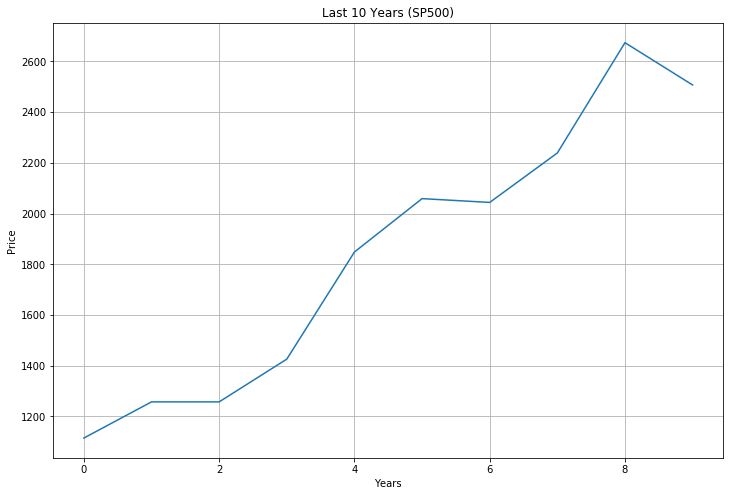

In [292]:
# Plot last 10 years for `sp 500`
ty['Price'].plot(grid=True, figsize=(12,8))
plt.title('Last 10 Years (SP500)')
plt.xlabel('Years')
plt.ylabel('Price')

# Plot
plt.show()

### Looking at Last 20 years including Great Recession

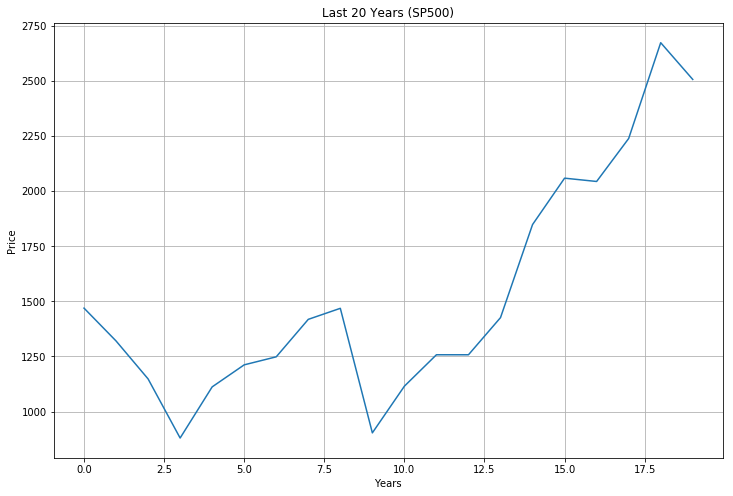

In [186]:
# 20 years of observations `sp 500`
ty2 = sp['s&p_500'][-20:] 
ty2 = pd.DataFrame({'Count':ty2.index, 'Price':ty2.values})

# Plotting last 20 years for `sp 500`
ty2['Price'].plot(grid=True, figsize=(12,8))
plt.title('Last 20 Years (SP500)')
plt.xlabel('Years')
plt.ylabel('Price')

# Plot
plt.show()

### All Yearly prices of SP500

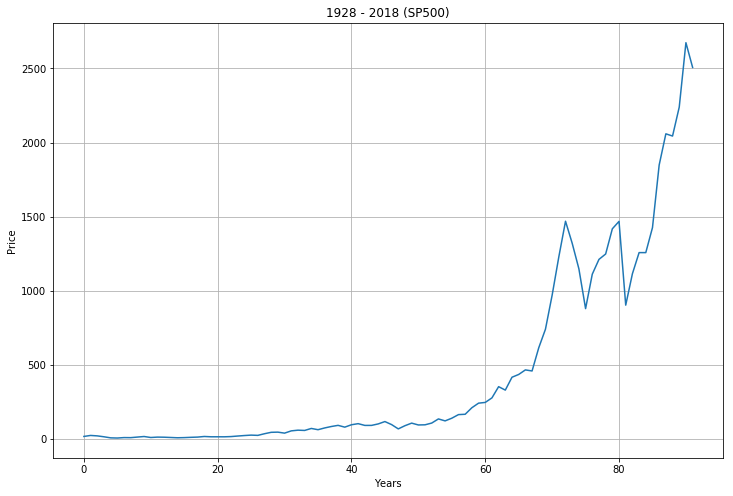

In [50]:
# Plotting the yearly prices for `sp 500`
sp['s&p_500'].plot(grid=True, figsize=(12,8))
plt.title('1928 - 2018 (SP500)')
plt.xlabel('Years')
plt.ylabel('Price')

# Plot
plt.show()

### Dividends

In [293]:
# Looking at dividend data
sp_div = sp['dividends']
sp_div = pd.DataFrame({'Count':sp_div.index, 'Div':sp_div.values})
del sp_div['Count']
sp_div.tail()

,Div
87,39.44
88,43.39
89,45.70
90,48.93
91,53.61


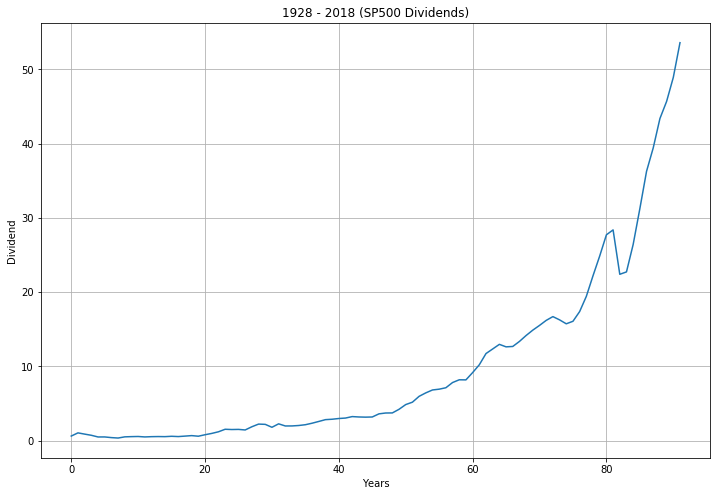

In [294]:
# Plotting the dividends since inception
sp['dividends'].plot(grid=True, figsize=(12,8))
plt.title('1928 - 2018 (SP500 Dividends)')
plt.xlabel('Years')
plt.ylabel('Dividend')

# Plot
plt.show()

In [295]:
# Looking at dividend yield data
sp['dividend_yield'].tail()

87    0.019156
88    0.021229
89    0.020412
90    0.018301
91    0.021385
Name: dividend_yield, dtype: float64

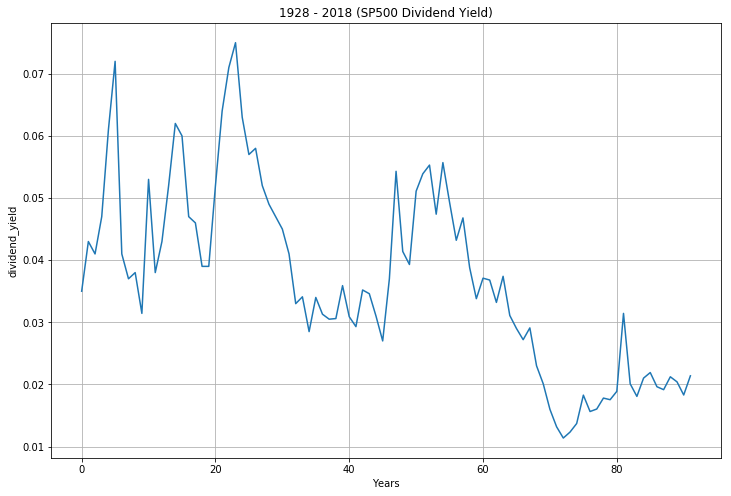

In [296]:
# Plotting the dividends yields since inception
sp['dividend_yield'].plot(grid=True, figsize=(12,8))
plt.title('1928 - 2018 (SP500 Dividend Yield)')
plt.xlabel('Years')
plt.ylabel('dividend_yield')

# Plot
plt.show()

In [297]:
sp['dividend_yield'].head()
# see that the yield was greater in 1928 than 2018

0    0.035
1    0.043
2    0.041
3    0.047
4    0.061
Name: dividend_yield, dtype: float64

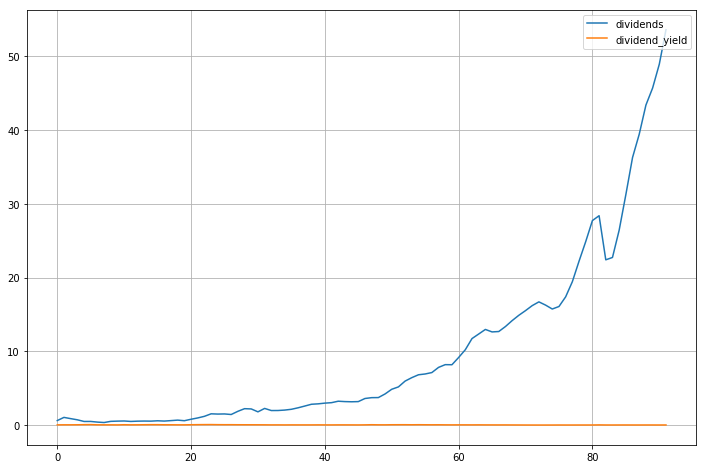

In [89]:
# Plot the dividends and dividend yield for `sp`
sp['dividends'].plot(grid=True, figsize=(12,8))
sp['dividend_yield'].plot(grid=True, figsize=(12,8))

plt.legend(loc='upper right')

plt.show()

# Did not work out as planned

### Percent Changes over time

In [298]:
# Calculating yearly percent changes
yearly_close = sp[['s&p_500']]

# Yearly returns
yearly_pct_change = yearly_close / yearly_close.shift(1) - 1

yearly_pct_change.tail() # Look at last 5 years

,s&p_500
87,0.113906
88,-0.007285
89,0.095372
90,0.194200
91,-0.062373


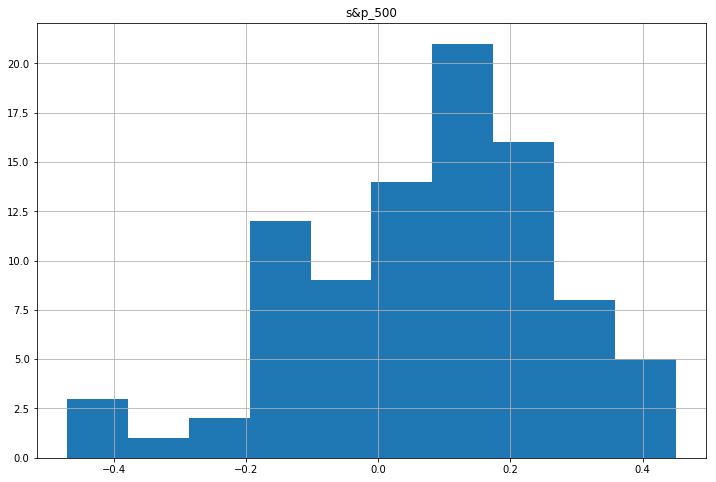

         s&p_500
count  91.000000
mean    0.074396
std     0.190487
min    -0.470665
25%    -0.057061
50%     0.104605
75%     0.201779
max     0.450222


In [299]:
# Plot distribution of `yearly_pct_change`
yearly_pct_change.hist(bins=10, figsize=(12,8))

# Plot
plt.show()

# Summary statistics
print(yearly_pct_change.describe())

# Symmetrical and normally distributed?

In [300]:
# Calculate cumulative yearly returns
c_yearly_return = (1 + yearly_pct_change).cumprod()

c_yearly_return.tail()

,s&p_500
87,116.585504
88,115.736127
89,126.774066
90,151.393545
91,141.950736


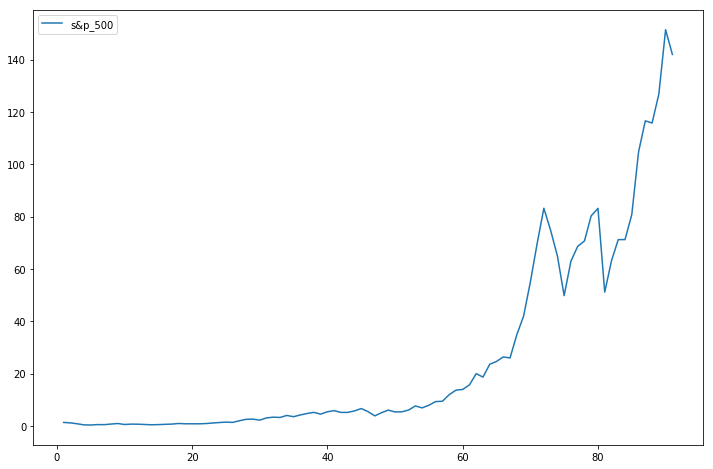

In [301]:
# Plot the cumulative yearly returns
c_yearly_return.plot(figsize=(12,8))

plt.show()

# Moving Windows

In [302]:
# Isolate the adjusted closing prices 
yr_close_px = sp['s&p_500']

# Calculate the moving average
moving_avg = yr_close_px.rolling(window=50).mean()

# Inspecting the result
print(moving_avg[-10:])

82    456.3058
83    480.2964
84    504.0174
85    531.2792
86    566.7460
87    606.2290
88    645.2584
89    688.4284
90    739.9712
91    788.0310
Name: s&p_500, dtype: float64


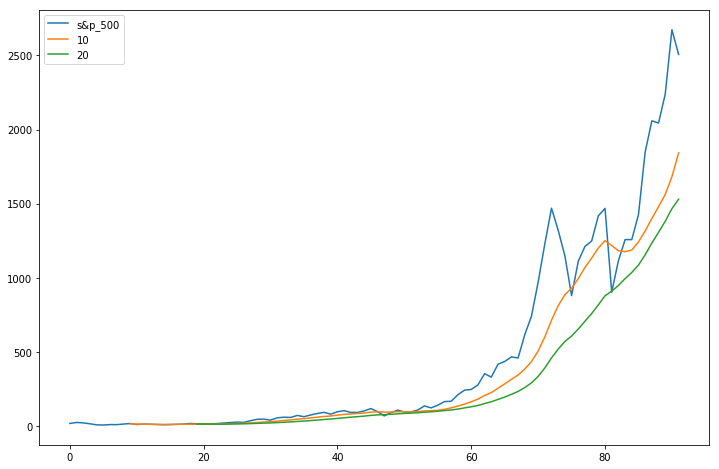

In [303]:
# Short moving window rolling mean
sp['10'] = yr_close_px.rolling(window=10).mean()

# Long moving window rolling mean
sp['20'] = yr_close_px.rolling(window=20).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
sp[['s&p_500', '10', '20']].plot(figsize=(12,8))

# Show plot
plt.show()

# Moving Average Trading Strategy

In [304]:
# Initialize the short and long windows
short_window = 10
long_window = 20

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=sp.index)
signals['signal'] = 0.0

# Short simple moving average over the short window
signals['short_mavg'] = sp['s&p_500'].rolling(window=short_window, min_periods=1, center=False).mean()

# Long simple moving average over the long window
signals['long_mavg'] = sp['s&p_500'].rolling(window=long_window, min_periods=1, center=False).mean()

# Signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Stats of signals
signals.describe()

,signal,short_mavg,long_mavg,positions
count,92.000000,92.000000,92.000000,91.000000
mean,0.771739,338.482982,262.821214,0.010989
std,0.422011,493.648742,399.760365,0.104828
min,0.000000,11.185000,12.527500,0.000000
25%,1.000000,18.575750,17.191250,0.000000
50%,1.000000,93.926000,73.718500,0.000000
75%,1.000000,396.968250,267.618500,0.000000
max,1.000000,1842.698000,1530.322500,1.000000


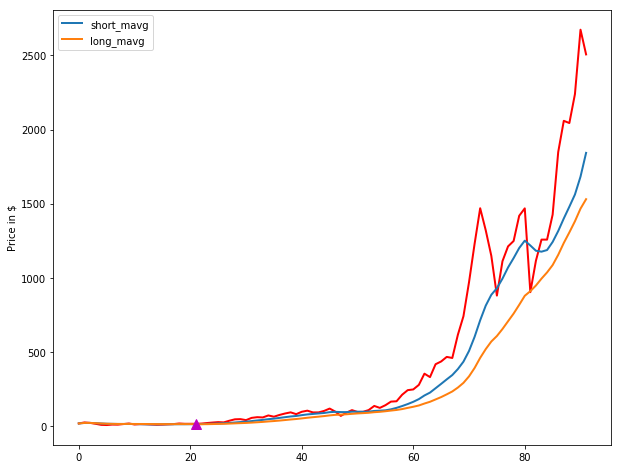

In [305]:
# Showing signal on chart

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
sp['s&p_500'].plot(ax=ax1, color='r', lw=2., figsize=(10, 8))

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

### 1 and 2 MA over all time

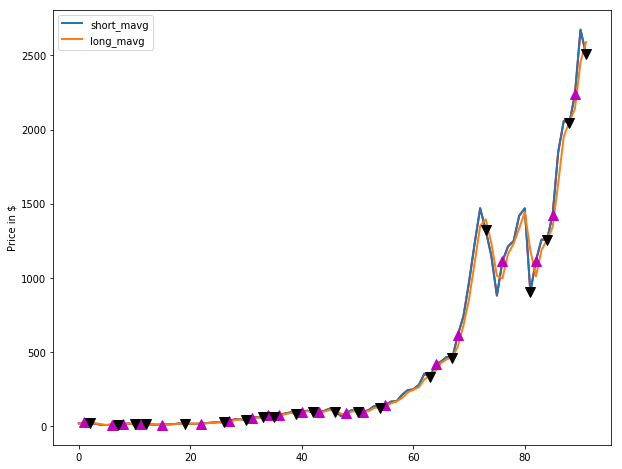

In [306]:
# Initialize the short and long windows
short_window = 1
long_window = 2

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=sp.index)
signals['signal'] = 0.0

# Short simple moving average over the short window
signals['short_mavg'] = sp['s&p_500'].rolling(window=short_window, min_periods=1, center=False).mean()

# Long simple moving average over the long window
signals['long_mavg'] = sp['s&p_500'].rolling(window=long_window, min_periods=1, center=False).mean()

# Signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
sp['s&p_500'].plot(ax=ax1, color='r', lw=2., figsize=(10, 8))

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

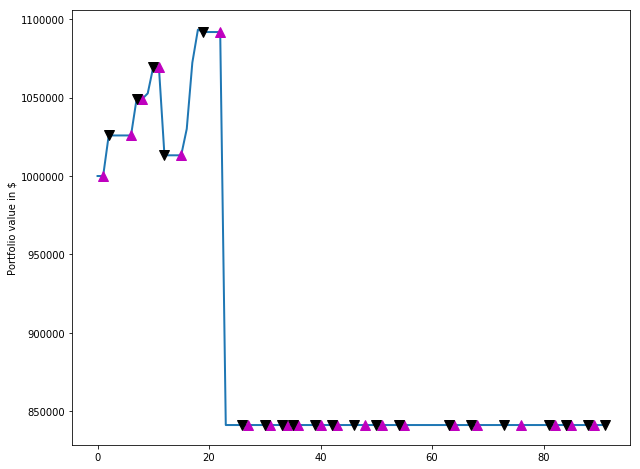

In [308]:
# Back Test

# Set the initial capital
initial_capital= float(1000000.00)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['SPY'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(born['Price'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(born['Price'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(born['Price'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Import the `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10, 8))

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

***

### Restrcuturing Strategy (23)

In [309]:
# 23 Years

# Last 23 observations / years of `sp 500`
born = sp['s&p_500'][-23:]
born = pd.DataFrame({'Count':born.index, 'Price':born.values})

del born['Count']

born.describe()

,Price
count,23.000000
mean,1458.558696
std,523.572265
min,740.740000
25%,1131.595000
50%,1257.640000
75%,1658.805000
max,2673.610000


In [310]:
# Short and long windows
short_window = 1
long_window = 2

#`Signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=sp.index)
signals['signal'] = 0.0

# Short simple moving average over the short window
signals['short_mavg'] = born['Price'].rolling(window=short_window, min_periods=1, center=False).mean()

# Long simple moving average over the long window
signals['long_mavg'] = born['Price'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

signals.describe()

,signal,short_mavg,long_mavg,positions
count,92.000000,23.000000,23.000000,91.000000
mean,0.163043,1458.558696,1420.165000,0.000000
std,0.371429,523.572265,494.653174,0.333333
min,0.000000,740.740000,740.740000,-1.000000
25%,0.000000,1131.595000,1130.872500,0.000000
50%,0.000000,1257.640000,1257.620000,0.000000
75%,0.000000,1658.805000,1540.302500,0.000000
max,1.000000,2673.610000,2590.230000,1.000000


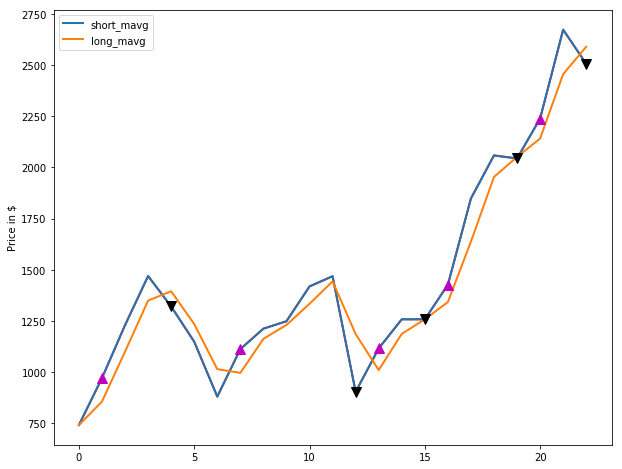

In [311]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
born['Price'].plot(ax=ax1, color='r', lw=2., figsize=(10, 8))

# Plot short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Plot
plt.show()

# Backtesting The Trading Strategy

In [312]:
# Set initial capital
initial_capital= float(1000000.00)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy 100 shares
positions['SPY'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(born['Price'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(born['Price'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(born['Price'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

# Print the first lines of `portfolio`
print(portfolio.head())

        SPY  holdings       cash      total   returns
0       0.0       0.0  1000000.0  1000000.0       NaN
1   97043.0   97043.0   902957.0  1000000.0  0.000000
2  122923.0  122923.0   902957.0  1025880.0  0.025880
3  146925.0  146925.0   902957.0  1049882.0  0.023396
4       0.0       0.0  1034985.0  1034985.0 -0.014189


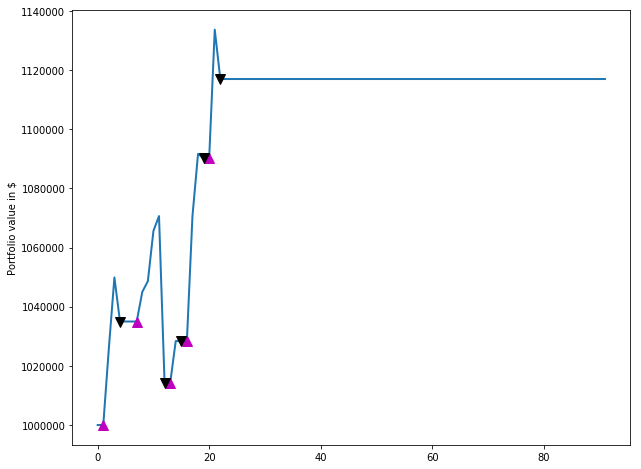

In [313]:
# Create a figure
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.,figsize=(10, 8))

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Plot
plt.show()

***

In [315]:
# Isolate the returns of strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print Sharpe ratio
print(sharpe_ratio)

2.0595290861545923


In [316]:
# Retest

returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(23) * (returns.mean() / returns.std())

# Print Sharpe ratio
print(sharpe_ratio)

0.6222022501543735


### Comparing SP to Bond Rates

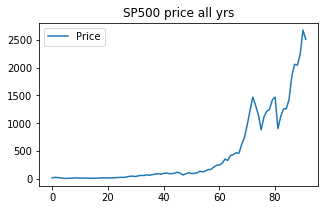

In [321]:
# SP500 price all yrs
sp_price = sp['s&p_500']
sp_price = pd.DataFrame({'Count':sp_price.index, 'Price':sp_price.values})
del sp_price['Count']

sp_price.plot(figsize=(5,3))
plt.title('SP500 price all yrs')

plt.show()

Text(0.5, 1.0, 'T Bond Rates all yrs')

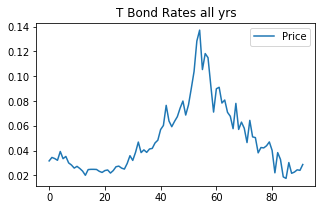

In [319]:
# T Bond Rates all yrs
tbr = sp['t.bond_rate']
tbr = pd.DataFrame({'Count':tbr.index, 'Price':tbr.values})
del tbr['Count']

tbr.plot(figsize=(5,3))
plt.title('T Bond Rates all yrs')

# Return on bonds 10yrsplt.show()

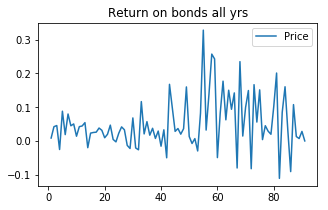

In [320]:
# Return on bonds all yrs
rob = sp['return_on_bond']
rob = pd.DataFrame({'Count':rob.index, 'Price':rob.values})
del rob['Count']

rob.plot(figsize=(5,3))
plt.title('Return on bonds all yrs')

plt.show()

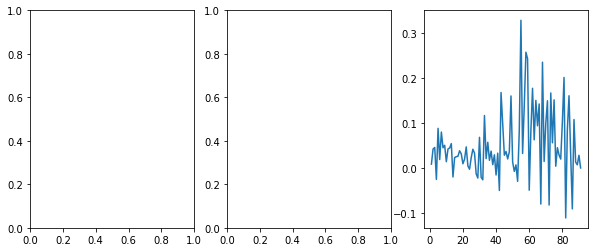

In [259]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

#axes[0].plot(sp_price)
#axes[1].plot(tbr)
axes[2].plot(rob)

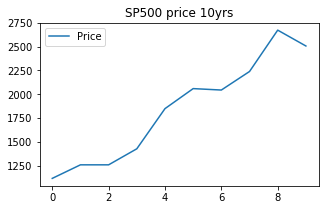

In [322]:
# SP500 price 10yrs
sp_price10 = sp['s&p_500'][-10:]
sp_price10 = pd.DataFrame({'Count':sp_price10.index, 'Price':sp_price10.values})
del sp_price10['Count']

sp_price10.plot(figsize=(5,3))
plt.title('SP500 price 10yrs')

plt.show()

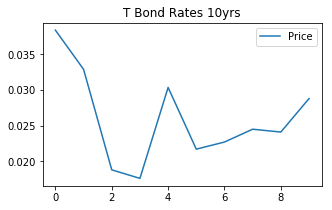

In [324]:
# T Bond Rates 10yrs
tbr10 = sp['t.bond_rate'][-10:]
tbr10 = pd.DataFrame({'Count':tbr10.index, 'Price':tbr10.values})
del tbr10['Count']

tbr10.plot(figsize=(5,3))
plt.title('T Bond Rates 10yrs')

plt.show()

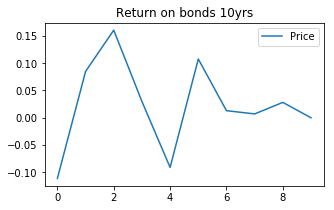

In [323]:
# Return on bonds 10yrs
rob10 = sp['return_on_bond'][-10:]
rob10 = pd.DataFrame({'Count':rob10.index, 'Price':rob10.values})
del rob10['Count']

rob10.plot(figsize=(5,3))
plt.title('Return on bonds 10yrs')

plt.show()